# 图像特效-LOMO效果

In [1]:
from scipy import signal
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [2]:
src = cv2.imread('../datas/sunset2.jpg')
gray = cv2.imread('../datas/sunset2.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [61]:
def lomo(src):
    srcf = np.float32(src)
    rows,cols = srcf.shape[0],srcf.shape[1]
    lut = np.arange(0,256)
    exponential_e = np.exp(1.0)
    x = lut / 255
    lut = np.round(255 * 1 / (1 + np.power(exponential_e,-((x-0.5) / 0.1)))).astype(np.uint8)
#     channels = cv2.split(srcf)
    result = cv2.LUT(src[:,:,0],lut)
    srcf[:,:,0] = np.float32(result)
    halo = np.zeros_like(srcf)
    halo.fill(0.3)
    cv2.circle(halo,(cols // 2,rows // 2),cols // 3,(1,1,1),-1)
    cv2.blur(halo,(cols // 3,cols // 3))
    halo = cv2.GaussianBlur(halo,(3,11),2.4)
    dst = cv2.multiply(srcf,halo)
    dst = np.clip(dst,0,255)
    return np.uint8(dst),halo

In [62]:
dst,halo = lomo(rgb)

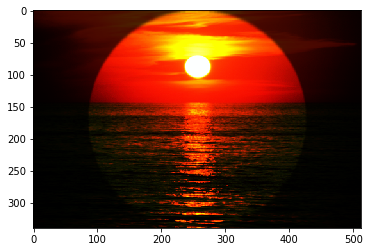

In [63]:
plt.imshow(dst)

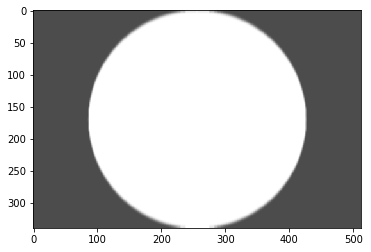

In [64]:
plt.imshow(halo)